# Boston House Dataset
## Importing Stuff, data set preparation
Set up the notebook and import the dataset into the variable `ds`.

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
ds = datasets.load_boston()

Let's first take a look at the description...

In [40]:
print(ds['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [41]:
#that is the data 
ds.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [42]:
#it has 13 attributes or features and 506 data points
ds.data.shape

(506, 13)

In [43]:
#and here are the feautre names.
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [44]:
#here are the target values for the 506 data points
ds.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

## Plotting the Distributions
[Boxplots](http://en.wikipedia.org/wiki/Box_plot) are a good way to show the distribution of attributes in data.



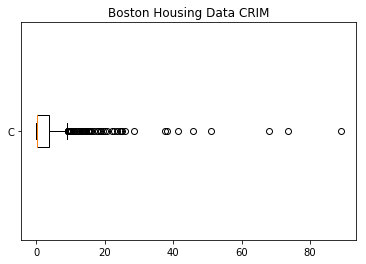

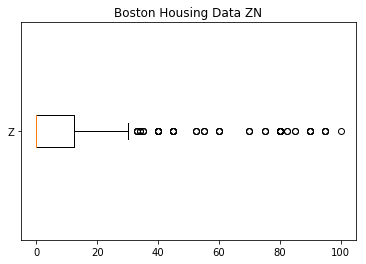

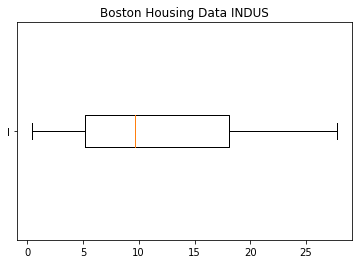

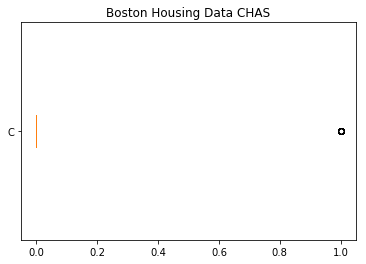

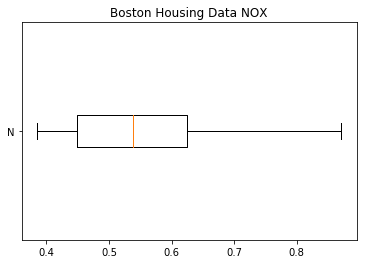

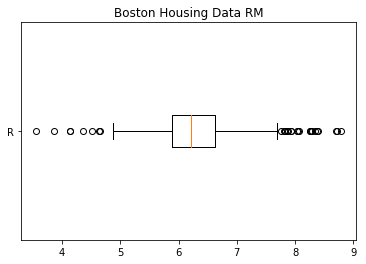

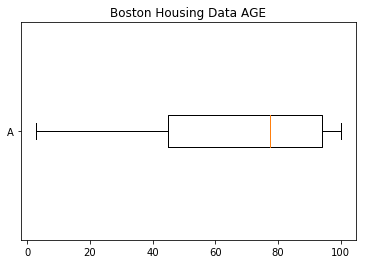

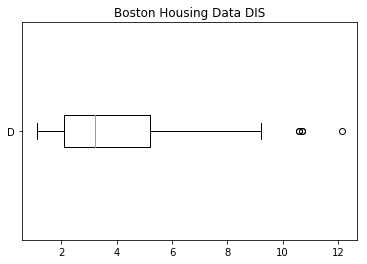

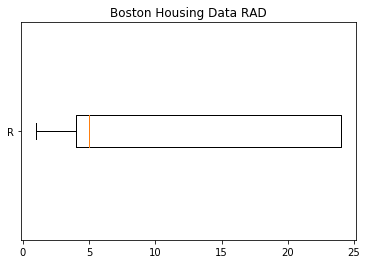

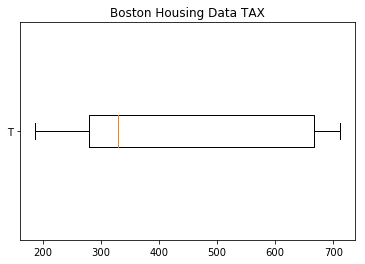

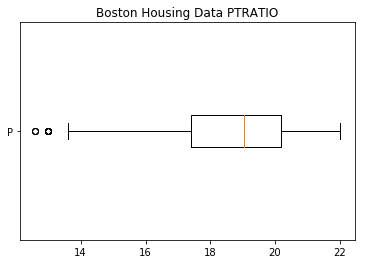

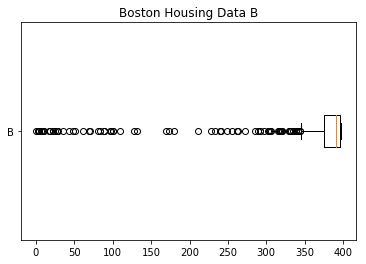

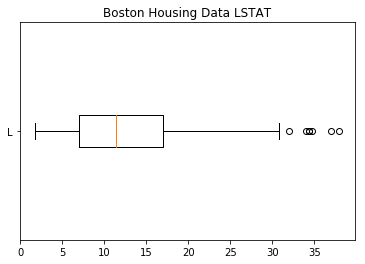

In [46]:
for i in range(ds.data.shape[1]):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.boxplot(ds.data[:,i],vert=False)
    ax1.set_title("Boston Housing Data "+ds.feature_names[i])
    ax1.set_yticklabels(ds.feature_names[i])

In [11]:
print (ds.feature_names)
print (np.min(ds.data,axis=0))
print (np.max(ds.data,axis=0))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   0.00000000e+00   4.60000000e-01   0.00000000e+00
   3.85000000e-01   3.56100000e+00   2.90000000e+00   1.12960000e+00
   1.00000000e+00   1.87000000e+02   1.26000000e+01   3.20000000e-01
   1.73000000e+00]
[  88.9762  100.       27.74      1.        0.871     8.78    100.
   12.1265   24.      711.       22.      396.9      37.97  ]


## Normalizing Attributes
We can rescale (aka centering/standardising) the data set by dividing each attribute through its range ($=max-min$) and subtracting the minimum $min$:

$$
  X = \frac{X-min(X)}{(max(X)-min(X)}
$$

with $max(X)$ and $min(X)$ are column vectors containing the minimum and maximum values of an attribute and / being the element wise division. Such scaling/centering should be part of every preprocessing, as discussed in the Lecture [On the Data](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-data.pdf)

Hence, the attributes are scaled within the range [0:1]

In [47]:
X = ds.data
Y = ds.target
X_scaled = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
print (X_scaled)

[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   2.87234043e-01
    1.00000000e+00   8.96799117e-02]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    1.00000000e+00   2.04470199e-01]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    9.89737254e-01   6.34657837e-02]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.07891832e-01]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    9.91300620e-01   1.31070640e-01]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.69701987e-01]]


## Compare `X` and its scaled Version `X_scaled`
We do this by comparing the boxplots.

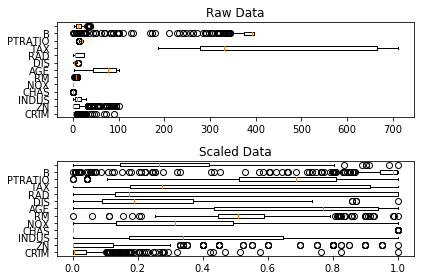

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.boxplot(X,vert=False)
ax2 = fig.add_subplot(2,1,2)
ax2.boxplot(X_scaled,vert=False)
ax2.set_title("Scaled Data")
ax1.set_title("Raw Data")
ax2.set_yticklabels(ds.feature_names[0:12])
ax1.set_yticklabels(ds.feature_names[0:12])
fig.tight_layout()
plt.show()

Watch the scales on the x-axis. The distribution of an attribute does not change (see for example TAX), but all attributes are now in the same range.
